# **Zakat Distribution Optimization**
## **Introduction:**
I propose a data-driven project to enhance Zakat fund distribution efficiency within the Islamic community. My project aims to develop an optimization model that automates fund allocation, ensuring adherence to Islamic principles while maximizing impact.

## **Problem Statement:**
Current manual Zakat fund distribution can lead to inefficiencies and bias. We seek to address this by creating an automated model that allocates funds equitably based on beneficiaries' needs and Islamic guidelines.

## **Goals:**

1. Develop an automated optimization model for fund distribution.
2. Incorporate Islamic principles to ensure ethical alignment.
3. Enhance transparency, trust, and dignity in fund allocation.
4. Maximize impact by directing funds where they're most needed.

## **Methodology:**

1. Collect beneficiary data: demographics, finances, location.
2. Develop optimization model with Islamic constraints.
3. Consider medical, education, housing needs, and location-based costs.
4. Collaborate with experts for religious and ethical alignment.

## **Potential Impact:**

1. **Equitable Distribution:** Funds allocated fairly based on needs.
2. **Increased Impact:** Funds used more effectively to improve lives.
3. **Transparency:** Clear criteria build trust and understanding.
4. **Efficiency:** Automated process reduces administrative load.
5. **Scalability:** Model adaptable to different contexts.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## **Data Collection**

In [ ]:
def generate_education_level():
    levels = ['None', 'Primary School', 'High School', "Bachelor's", 'Master’s', 'Ph.D.']
    return random.choice(levels)

def generate_location():
    locations = ['Urban', 'Rural', 'Suburban']
    return random.choice(locations)

In [ ]:
random.seed(42)
data = []
for _ in range(1000):
    data.append([
        _ + 1,
        random.randint(18, 80),
        random.choice(['Male', 'Female']),
        random.randint(1, 10),
        random.randint(200, 3000),
        random.randint(100, 2000),
        random.randint(0, 500),
        generate_education_level(),
        random.randint(0, 500),
        random.randint(0, 500),
        generate_location()
    ])

# Create DataFrame
columns = [
    'Beneficiary_ID', 'Age', 'Gender', 'Family_Size', 'Income',
    'Expenses', 'Debts', 'Education_Level', 'Medical_Expenses',
    'Housing_Needs', 'Location'
]

df = pd.DataFrame(data, columns=columns)

# Save DataFrame to a CSV file
df.to_csv('zakat_dataset.csv', index=False)

In [ ]:
df

,Beneficiary_ID,Age,Gender,Family_Size,Income,Expenses,Debts,Education_Level,Medical_Expenses,Housing_Needs,Location
0,1,58,Male,1,1326,601,114,Primary School,377,52,Suburban
1,2,65,Male,10,1928,165,15,None,111,119,Suburban
2,3,56,Male,9,1014,1566,332,Ph.D.,279,214,Urban
3,4,46,Female,1,853,1529,216,High School,142,79,Urban
4,5,79,Female,2,579,878,49,High School,433,176,Suburban
...,...,...,...,...,...,...,...,...,...,...,...
995,996,76,Female,6,2839,932,404,None,140,443,Urban
996,997,70,Female,8,1891,1997,430,High School,367,216,Urban
997,998,70,Male,5,2273,235,180,Bachelor's,308,373,Suburban
998,999,65,Female,8,312,1660,26,Ph.D.,328,94,Suburban


## **Data Preprocessing**

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isna().sum()

Beneficiary_ID      0
Age                 0
Gender              0
Family_Size         0
Income              0
Expenses            0
Debts               0
Education_Level     0
Medical_Expenses    0
Housing_Needs       0
Location            0
dtype: int64

## **EDA**

In [ ]:
df.describe()

,Beneficiary_ID,Age,Family_Size,Income,Expenses,Debts,Medical_Expenses,Housing_Needs
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,48.05700,5.507000,1648.34700,1043.677000,256.936000,251.016000,250.835000
std,288.819436,17.92208,2.853786,811.00794,551.868156,141.605742,145.053984,140.479829
min,1.000000,18.00000,1.000000,204.00000,105.000000,0.000000,0.000000,0.000000
25%,250.750000,32.00000,3.000000,955.25000,557.250000,142.000000,127.000000,135.000000
50%,500.500000,48.00000,6.000000,1674.00000,1035.000000,265.500000,260.500000,248.000000
75%,750.250000,63.00000,8.000000,2359.00000,1518.750000,377.000000,369.250000,371.000000
max,1000.000000,80.00000,10.000000,2999.00000,2000.000000,500.000000,500.000000,499.000000


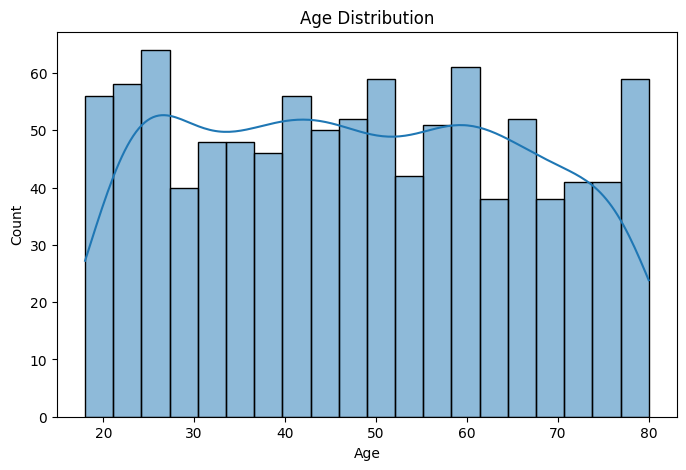

In [ ]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Income vs Expenses')

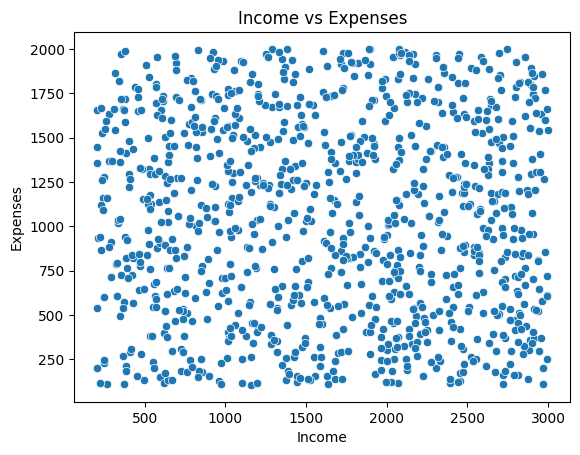

In [ ]:
sns.scatterplot(x='Income', y='Expenses', data=df)
plt.title('Income vs Expenses')

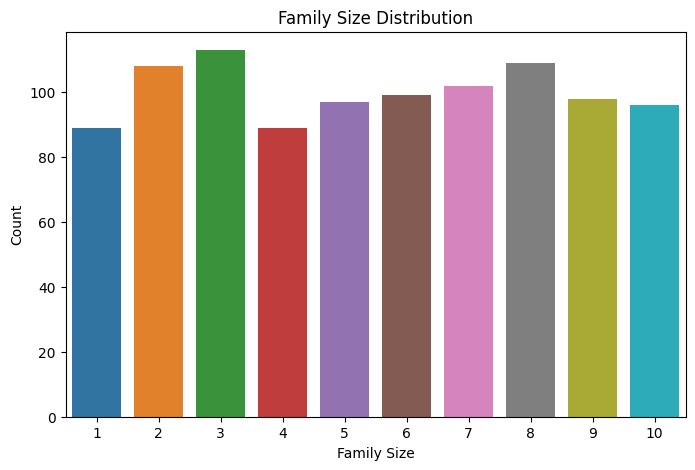

In [ ]:
# Family size distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Family_Size', data=df)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [ ]:
fig = px.pie(df,names='Education_Level')
fig.show()

## **Modeling**

In [ ]:
categorical_columns = ['Gender', 'Education_Level', 'Location']
category_mappings = {}

for column in categorical_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    category_mappings[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(category_mappings)

{'Gender': {'Female': 0, 'Male': 1}, 'Education_Level': {"Bachelor's": 0, 'High School': 1, 'Master’s': 2, 'None': 3, 'Ph.D.': 4, 'Primary School': 5}, 'Location': {'Rural': 0, 'Suburban': 1, 'Urban': 2}}


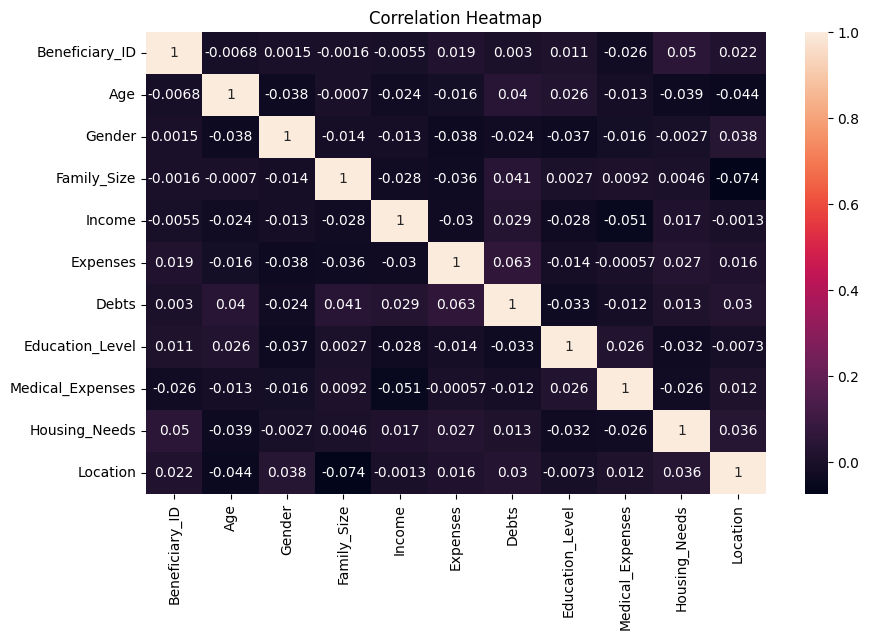

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data_for_clustering = df[['Age', 'Income', 'Expenses', 'Family_Size']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

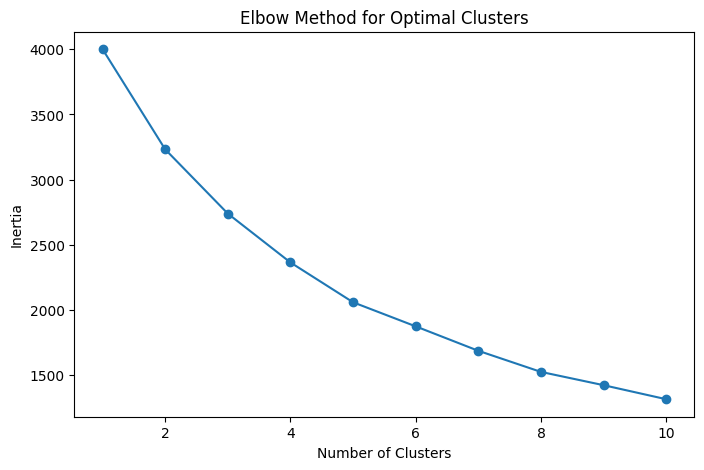

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
scatter_plot = px.scatter(
    data_frame=df,
    x='Income',
    y='Expenses',
    color='Cluster',
    hover_name='Cluster',  # Display the cluster label on hover
    title='Income vs Expenses by Cluster'
)

# Show the scatter plot
scatter_plot.show()